<a href="https://colab.research.google.com/github/agustinsilva447/Fisica-de-los-Semiconductores/blob/main/5_Kronig_Penny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def KPM_Soln(a,b,U0,eps_range): # entrada a, b espaciado en Angstroms, potencial en eV y rango total deseado para la salida
    # constantes
    h_bar = 1.054*1e-34    #J*s
    m = 9.109*1e-31        #kg
    alpha_0 = (2*m*U0*1.602*1e-19/h_bar**2)**(1/2)  #m^-1

    # Kronig-Penny Solution (LHS), con épsilon = E/U0
    def KPM_p(eps):  # para epsilon > 1
        return (1-2*eps)/(2*(eps*(eps-1))**(1/2))*np.sin(alpha_0*a*1e-10*eps**(1/2))*np.sin(alpha_0*b*1e-10*(eps-1)**(1/2))+np.cos(alpha_0*a*1e-10*eps**(1/2))*np.cos(alpha_0*b*1e-10*(eps-1)**(1/2))
    def KPM_m(eps):  # para epison < 1
        return (1-2*eps)/(2*(eps*(1-eps))**(1/2))*np.sin(alpha_0*a*1e-10*eps**(1/2))*np.sinh(alpha_0*b*1e-10*(1-eps)**(1/2))+np.cos(alpha_0*a*1e-10*eps**(1/2))*np.cosh(alpha_0*b*1e-10*(1-eps)**(1/2))

    # Definir el espacio épsilon para graficar
    epslist = np.linspace(0,eps_range,200000)
    f_eps = np.piecewise(epslist, [epslist < 1, epslist > 1], [KPM_m, KPM_p])
    
    return epslist, f_eps

In [3]:
def Eband_KP(epslist,f_eps): # datos de la banda de energía
    k=[]
    bandlist=[]
    Eps=[]
    epsbuildlist=[]
    for i in range(len(f_eps)-1):
       if 1 >= f_eps[i] >= -1:
           bandlist.append(f_eps[i])
           epsbuildlist.append(epslist[i])
           if (1 < f_eps[i+1] or  -1 > f_eps[i+1]):
               k.append(bandlist)
               Eps.append(epsbuildlist)
               bandlist=[]
               epsbuildlist=[]

    for i in range(len(k)):
        k[i]=np.arccos(k[i])/np.pi
        if i % 2 == 0:
            Eps[i]=np.concatenate((Eps[i][::-1],Eps[i][::1]))
            k[i]=np.concatenate((-1*np.array(k[i],dtype=float)[::-1],k[i][::1]))
        else:
            k[i]=np.concatenate((k[i][::1],-1*np.array(k[i],dtype=float)[::-1]))
            Eps[i]=np.concatenate((Eps[i][::1],Eps[i][::-1]))
                                                      
    return k, Eps

In [4]:
# Variables del sistema
a = 2.7         # Angstroms
b = 2.7         # Angstroms
U0 = 5          # eV
eps_range = 5

In [5]:
epslist, f_eps = KPM_Soln(a,b,U0,eps_range)
k, eps = Eband_KP(epslist, f_eps)

<ipython-input-2-a04bbdcfad87>:11: RuntimeWarning: divide by zero encountered in true_divide
  return (1-2*eps)/(2*(eps*(1-eps))**(1/2))*np.sin(alpha_0*a*1e-10*eps**(1/2))*np.sinh(alpha_0*b*1e-10*(1-eps)**(1/2))+np.cos(alpha_0*a*1e-10*eps**(1/2))*np.cosh(alpha_0*b*1e-10*(1-eps)**(1/2))
<ipython-input-2-a04bbdcfad87>:11: RuntimeWarning: invalid value encountered in multiply
  return (1-2*eps)/(2*(eps*(1-eps))**(1/2))*np.sin(alpha_0*a*1e-10*eps**(1/2))*np.sinh(alpha_0*b*1e-10*(1-eps)**(1/2))+np.cos(alpha_0*a*1e-10*eps**(1/2))*np.cosh(alpha_0*b*1e-10*(1-eps)**(1/2))


In [6]:
# valores de k para graficar para la solución RHS
klist=np.linspace(0,eps_range,10)  
k_min=klist*0-1
k_max=klist*0+1

In [7]:
Eg = (np.min(eps[2])-np.max(eps[1]))*U0
print("Mínima diferencia entre bandas de energía = {} eV".format(Eg))

Mínima diferencia entre bandas de energía = 0.7127035635178176 eV


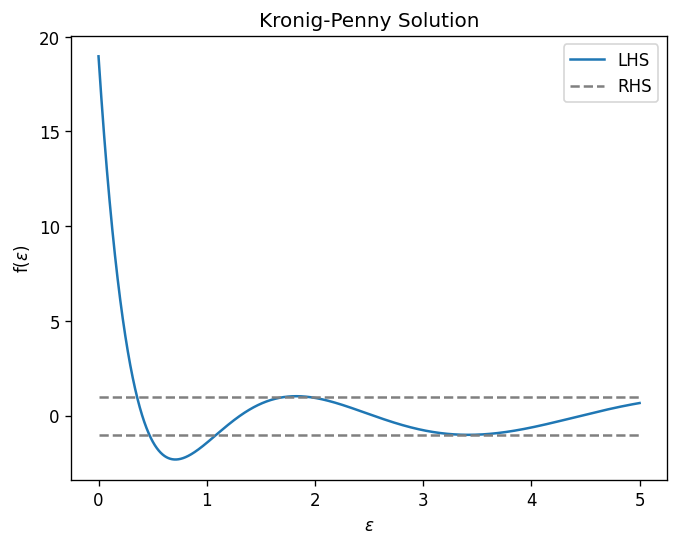

In [8]:
# Gráficos de la Kronig-Penny Solution
plt.figure(1,dpi=120)
plt.title("Kronig-Penny Solution")
plt.xlabel("$\epsilon$")
plt.ylabel("f($\epsilon$)")
plt.plot(epslist,f_eps,label="LHS")
plt.plot(klist,k_min, linestyle="dashed",color="grey",label="RHS")
plt.plot(klist,k_max, linestyle="dashed",color="grey")
plt.legend()
plt.show()  

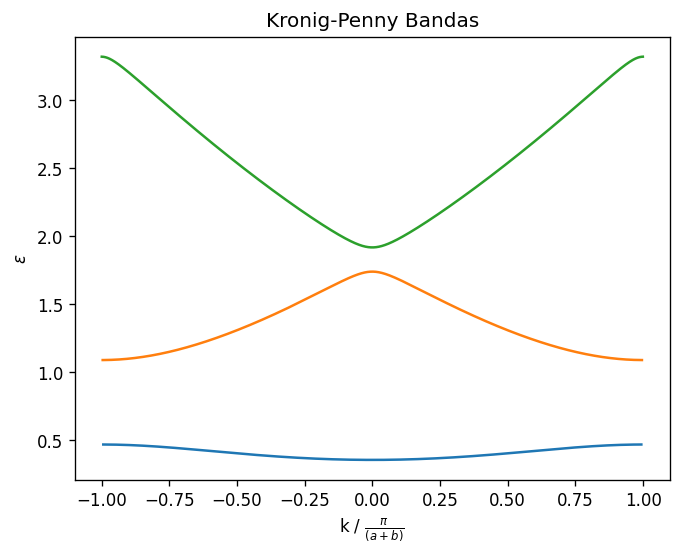

In [9]:
plt.figure(2,dpi=120)
plt.title("Kronig-Penny Bandas")
plt.xlabel(r'k / $\frac{\pi}{(a+b)}$')
plt.ylabel("$\epsilon$")
for i in range(len(k)):
    plt.plot(k[i],eps[i])
plt.show()    